In [ ]:
#We are using tensorflow keras for building neural network model of flight price prediction

In [1]:
##importing all necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
#relu is a activation function and outputs if x>0 : output=x else output=0
#we are having 30 input atrributes in which 9 are continuous and 21 are one hot encoded

In [179]:

model = keras.models.Sequential([
    keras.layers.Dense(32,activation='relu',input_shape=[30]),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1)
    
])

In [ ]:
#model contains only one hidden layer and one output layer

In [180]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 32)                992       
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [197]:
# we are calculating loss by measuring mean_squared error
# adam is an good optimizer it prevents gradient exploding problem to the some extent
model.compile(loss= 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mae'])

In [5]:
#reading Train data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,random_state = 42)

In [8]:
X_train.columns

Index(['Duration', 'Total_Stops', 'Arr_Time_Min', 'Arr_Time_Hour',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Day_of_Journey', 'Month_of_Journey',
       'Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [9]:
X_train.head()

,Duration,Total_Stops,Arr_Time_Min,Arr_Time_Hour,Dep_Time_Hour,Dep_Time_Min,Day_of_Journey,Month_of_Journey,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6823,750,1,5,22.0,9,35,9,5,0,0,...,0,0,1,0,1,0,0,0,0,0
2523,505,1,0,19.0,10,35,21,5,0,0,...,0,1,0,0,0,1,0,0,0,0
2888,1535,1,50,6.0,5,15,27,5,0,1,...,0,1,0,0,0,1,0,0,0,0
373,660,1,10,8.0,21,10,24,3,0,0,...,0,0,1,0,1,0,0,0,0,0
7930,1300,2,25,4.0,6,45,1,6,0,0,...,0,1,0,0,0,1,0,0,0,0


In [10]:
y_train.head()

,Price
6823,14151
2523,9103
2888,8425
373,14231
7930,10919


##### we are Scaling continuous attributes because it is good to use when attribute values are very high

In [11]:
X_train1 = X_train.iloc[:,:9]
X_valid1 = X_valid.iloc[:,:9]

In [12]:
HotEncodetrain = X_train.iloc[:,9:]
HotEncodevalid = X_valid.iloc[:,9:]

In [13]:
X_test = pd.read_csv('X_test.csv')

In [14]:
y_test = pd.read_csv('y_test.csv')

In [15]:
X_test1 = X_test.iloc[:,:9]
HotEncodetest = X_test.iloc[:,9:]

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_valid1 = scaler.transform(X_valid1)
X_test1 = scaler.transform(X_test1)

In [17]:
HotEncodetrain = np.array(HotEncodetrain)
HotEncodetest = np.array(HotEncodetest)

In [18]:
X_train = np.concatenate([X_train1,HotEncodetrain],axis=1)
X_valid = np.concatenate([X_valid1,HotEncodevalid],axis=1)
X_test = np.concatenate([X_test1,HotEncodetest],axis=1)

In [212]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#training model for 200 epochs

In [213]:
model_history = model.fit(X_train,y_train,epochs = 200,validation_data = (X_valid,y_valid))

Epoch 1/200
201/201 [==============================] - 2s 8ms/step - loss: 103933408.0000 - mae: 9070.2900 - val_loss: 103022768.0000 - val_mae: 9096.5000
Epoch 2/200
201/201 [==============================] - 1s 7ms/step - loss: 100556648.0000 - mae: 8904.4355 - val_loss: 95424688.0000 - val_mae: 8723.0273
Epoch 3/200
201/201 [==============================] - 1s 7ms/step - loss: 86978840.0000 - mae: 8205.8760 - val_loss: 75578064.0000 - val_mae: 7657.6792
Epoch 4/200
201/201 [==============================] - 1s 6ms/step - loss: 62735472.0000 - mae: 6766.0825 - val_loss: 48325328.0000 - val_mae: 5851.7544
Epoch 5/200
201/201 [==============================] - 1s 7ms/step - loss: 36903920.0000 - mae: 4757.5454 - val_loss: 25828846.0000 - val_mae: 3777.4846
Epoch 6/200
201/201 [==============================] - 1s 6ms/step - loss: 20509566.0000 - mae: 3097.1819 - val_loss: 15488064.0000 - val_mae: 2653.7344
Epoch 7/200
201/201 [==============================] - 1s 7ms/step - loss: 1451

Epoch 55/200
201/201 [==============================] - 1s 6ms/step - loss: 9354725.0000 - mae: 1987.1829 - val_loss: 8977548.0000 - val_mae: 1955.4410
Epoch 56/200
201/201 [==============================] - 1s 7ms/step - loss: 9348458.0000 - mae: 1982.6658 - val_loss: 8968569.0000 - val_mae: 1959.3933
Epoch 57/200
201/201 [==============================] - 1s 7ms/step - loss: 9343315.0000 - mae: 1988.5554 - val_loss: 8964971.0000 - val_mae: 1953.6250
Epoch 58/200
201/201 [==============================] - 1s 6ms/step - loss: 9332425.0000 - mae: 1984.6150 - val_loss: 8953518.0000 - val_mae: 1954.7732
Epoch 59/200
201/201 [==============================] - 1s 7ms/step - loss: 9326435.0000 - mae: 1984.2363 - val_loss: 8944156.0000 - val_mae: 1952.2405
Epoch 60/200
201/201 [==============================] - 1s 7ms/step - loss: 9321530.0000 - mae: 1983.7949 - val_loss: 8954901.0000 - val_mae: 1945.0975
Epoch 61/200
201/201 [==============================] - 1s 6ms/step - loss: 9314495.0000

Epoch 109/200
201/201 [==============================] - 1s 7ms/step - loss: 9067830.0000 - mae: 1928.0006 - val_loss: 8718206.0000 - val_mae: 1898.6427
Epoch 110/200
201/201 [==============================] - 1s 7ms/step - loss: 9062906.0000 - mae: 1925.5531 - val_loss: 8704781.0000 - val_mae: 1900.7457
Epoch 111/200
201/201 [==============================] - 1s 7ms/step - loss: 9059189.0000 - mae: 1927.2107 - val_loss: 8705610.0000 - val_mae: 1900.5905
Epoch 112/200
201/201 [==============================] - 1s 7ms/step - loss: 9055597.0000 - mae: 1924.3989 - val_loss: 8702249.0000 - val_mae: 1899.9136
Epoch 113/200
201/201 [==============================] - 1s 7ms/step - loss: 9053929.0000 - mae: 1923.9781 - val_loss: 8695226.0000 - val_mae: 1898.4047
Epoch 114/200
201/201 [==============================] - 1s 7ms/step - loss: 9045167.0000 - mae: 1926.8962 - val_loss: 8700567.0000 - val_mae: 1897.0096
Epoch 115/200
201/201 [==============================] - 1s 7ms/step - loss: 90424

4448.141046831956

In [214]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 83ms/step


array([[14573.544],
       [ 9675.651],
       [11048.831],
       [10404.605],
       [11579.236]], dtype=float32)

In [215]:
y_test[:5]

,Price
0,9134
1,9486
2,10697
3,11806
4,7594


In [134]:
mae_test = model.evaluate(X_test,y_test)

67/67 [==============================] - 0s 5ms/step - loss: 21080604.0000 - mae: 3711.9072


In [216]:
y_pred = model.predict(X_test)

67/67 [==============================] - 0s 4ms/step


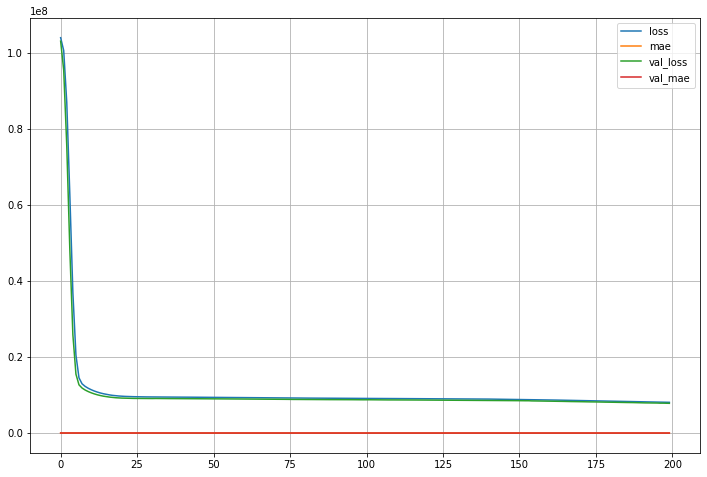

In [217]:
pd.DataFrame(model_history.history).plot(figsize = (12,8))
plt.grid(True)

plt.show()

In [ ]:
# Accuracy achieved is 47.2%

In [218]:
from sklearn import metrics
metrics.r2_score(y_pred,y_test)

0.47228905599708737

In [219]:
print(min(model.predict(X_test[:])))
print(max(model.predict(X_test[:])))

67/67 [==============================] - 0s 4ms/step
[2018.4048]
67/67 [==============================] - 0s 4ms/step
[23333.648]


In [220]:
print(min(y_test['Price']),max(y_test['Price']))

1759 52285


In [ ]:
#Saving the model

In [221]:
model.save('flight_perceptron_model1.h5')

In [2]:
from tensorflow import keras
model = keras.models.load_model('flight_perceptron_model1.h5')

##### similarily we also tried training model  Without transforming the features
##### But it did give good accuracy 51.39

In [144]:
#Without transforming the features
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [145]:
model = keras.models.Sequential([
    keras.layers.Dense(32,activation='relu',input_shape=[30]),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1)
    
])

In [22]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [23]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,random_state = 42)

In [24]:
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)
X_valid1 = np.array(X_valid)
y_valid1 = np.array(y_valid)

In [25]:
print(X_train1.shape,X_train1[:2])
print(y_train1.shape,y_train1[:2])

(6408, 30) [[750.   1.   5.  22.   9.  35.   9.   5.   0.   0.   0.   0.   1.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   0.   0.
    0.   0.]
 [505.   1.   0.  19.  10.  35.  21.   5.   0.   0.   0.   0.   0.   0.
    1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   1.   0.   0.
    0.   0.]]
(6408, 1) [[14151]
 [ 9103]]


In [150]:
model.compile(loss= 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mae'])

In [151]:
model_history = model.fit(X_train1,y_train1,epochs = 200,validation_data = (X_valid1,y_valid1))

Epoch 1/200
201/201 [==============================] - 2s 8ms/step - loss: 77006904.0000 - mae: 7542.8271 - val_loss: 35014156.0000 - val_mae: 4617.2979
Epoch 2/200
201/201 [==============================] - 1s 7ms/step - loss: 28227756.0000 - mae: 3885.3438 - val_loss: 24853626.0000 - val_mae: 3642.3008
Epoch 3/200
201/201 [==============================] - 1s 7ms/step - loss: 25865342.0000 - mae: 3608.4673 - val_loss: 23398532.0000 - val_mae: 3443.8669
Epoch 4/200
201/201 [==============================] - 1s 6ms/step - loss: 24336630.0000 - mae: 3406.3552 - val_loss: 21924462.0000 - val_mae: 3241.2249
Epoch 5/200
201/201 [==============================] - 1s 7ms/step - loss: 22803624.0000 - mae: 3220.1943 - val_loss: 20488574.0000 - val_mae: 3073.3333
Epoch 6/200
201/201 [==============================] - 1s 7ms/step - loss: 21463984.0000 - mae: 3091.7175 - val_loss: 19308576.0000 - val_mae: 2997.8320
Epoch 7/200
201/201 [==============================] - 1s 7ms/step - loss: 2039963

201/201 [==============================] - 1s 6ms/step - loss: 9680860.0000 - mae: 2004.2964 - val_loss: 9467341.0000 - val_mae: 2020.6825
Epoch 108/200
201/201 [==============================] - 1s 7ms/step - loss: 9620694.0000 - mae: 1992.8033 - val_loss: 9431479.0000 - val_mae: 2015.0597
Epoch 109/200
201/201 [==============================] - 1s 6ms/step - loss: 9635077.0000 - mae: 2001.0134 - val_loss: 9456866.0000 - val_mae: 1984.5465
Epoch 110/200
201/201 [==============================] - 1s 6ms/step - loss: 9614438.0000 - mae: 2000.7069 - val_loss: 9468560.0000 - val_mae: 1985.3357
Epoch 111/200
201/201 [==============================] - 1s 7ms/step - loss: 9559780.0000 - mae: 1993.1779 - val_loss: 9320597.0000 - val_mae: 1995.2108
Epoch 112/200
201/201 [==============================] - 1s 6ms/step - loss: 9532025.0000 - mae: 1992.9426 - val_loss: 9292546.0000 - val_mae: 1992.0765
Epoch 113/200
201/201 [==============================] - 1s 7ms/step - loss: 9503443.0000 - mae:

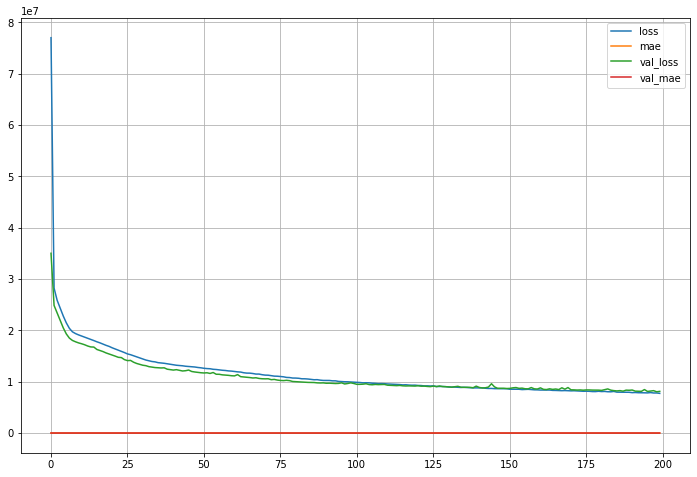

In [152]:
pd.DataFrame(model_history.history).plot(figsize = (12,8))
plt.grid(True)

plt.show()

In [153]:
X_test = np.array(pd.read_csv('X_test.csv'))
y_test = np.array(pd.read_csv('y_test.csv'))

In [154]:
model.predict(X_test[:5])

1/1 [==============================] - 0s 78ms/step


array([[14065.607],
       [10063.918],
       [10884.699],
       [11546.091],
       [12110.155]], dtype=float32)

In [155]:
y_test[:5]

array([[ 9134],
       [ 9486],
       [10697],
       [11806],
       [ 7594]], dtype=int64)

In [156]:
model.evaluate(X_test,y_test)

67/67 [==============================] - 0s 6ms/step - loss: 7242240.0000 - mae: 1821.3717


[7242240.0, 1821.3717041015625]

In [157]:
model.save('flight_perceptron_model.h5')

In [27]:
from tensorflow import keras
model = keras.models.load_model('flight_perceptron_model.h5')

In [8]:
y_pred = model.predict(X_test)
metrics.r2_score(y_pred,y_test)

67/67 [==============================] - 0s 2ms/step


0.5139991146253753